# Marketing Measurement Frameworks

1. Attribution Models
2. Customer Lifetime Value (CLV)
3. ROI Calculation

##### Importing Packages

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print("Packages successfully imported!")

Packages successfully imported!


#### Data Inspection

In [46]:
data = pd.read_csv("data/data_raw.csv")
data_enc = pd.read_csv("data/data_encoded.csv")
data_norm = pd.read_csv("data/data_normal.csv")

print("Data loaded")

Data loaded


In [47]:
print(f"Data Columns:{data.columns.tolist()}")

Data Columns:['Customer ID', 'Gender', 'Age', 'City', 'Membership Type', 'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied', 'Days Since Last Purchase', 'Satisfaction Level']


### 1. Attribution Models

Last-Click Attribution:
marketing_channel
Affiliate       59
Email           49
Paid Search     45
Social Media    38
Name: conversion, dtype: int64


/var/folders/zy/5chfsfsd461fc9x38r61w2xr0000gn/T/ipykernel_75864/707757104.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=last_click_attribution.index, y=last_click_attribution.values, palette="Set2")


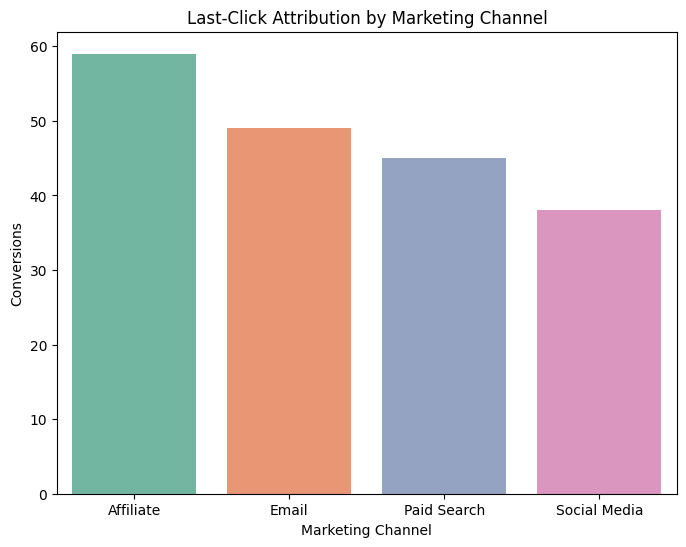

In [48]:
np.random.seed(42)

# Simulating marketing channels and conversions
data['marketing_channel'] = np.random.choice(['Email', 'Social Media', 'Paid Search', 'Affiliate'], size=len(data))
data['conversion'] = np.random.choice([0, 1], size=len(data))

# Implement Last-Click Attribution
last_click_attribution = data.groupby('marketing_channel')['conversion'].sum()

print("Last-Click Attribution:")
print(last_click_attribution)

# Optional: Visualize the Attribution Results
plt.figure(figsize=(8, 6))
sns.barplot(x=last_click_attribution.index, y=last_click_attribution.values, palette="Set2")
plt.title("Last-Click Attribution by Marketing Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("Conversions")
plt.show()

### 2. Customer Lifetime Value (CLV)

Customer Lifetime Value (CLV) for Top 5 Customers:
Customer ID
440    3442.707692
428    3388.061538
416    3333.415385
404    3278.769231
392    3224.123077
Name: CLV, dtype: float64


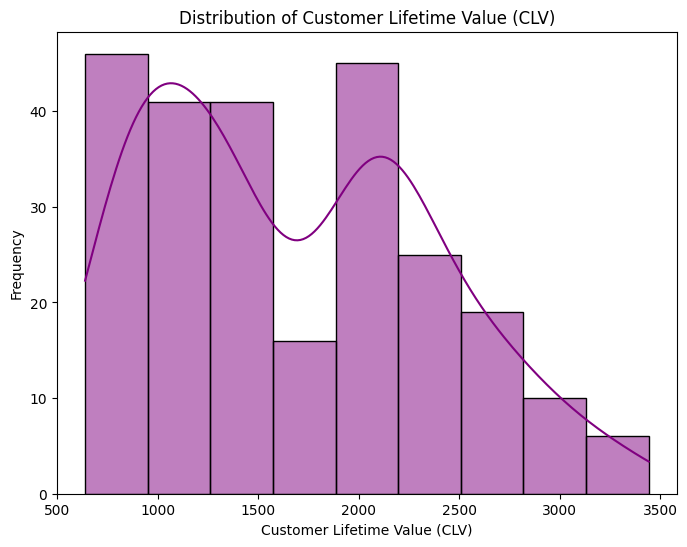

In [49]:
# CLV Calculation

# Calculate average purchase value
data['avg_purchase_value'] = data['Total Spend'] / data['Items Purchased']

# Calculate purchase frequency (number of purchases per customer)
purchase_frequency = data.groupby('Customer ID')['Items Purchased'].count()

# Estimate customer lifespan (total days since first purchase to last purchase)
data['customer_lifespan'] = data.groupby('Customer ID')['Days Since Last Purchase'].transform('max')

# Calculate CLV
data['CLV'] = data['avg_purchase_value'] * purchase_frequency * data['customer_lifespan']

# Group by customer to get unique CLV per customer
customer_clv = data.groupby('Customer ID')['CLV'].mean()

print("Customer Lifetime Value (CLV) for Top 5 Customers:")
print(customer_clv.sort_values(ascending=False).head())

# Optional: Visualize the CLV Distribution
plt.figure(figsize=(8, 6))
sns.histplot(customer_clv, kde=True, color='purple')
plt.title("Distribution of Customer Lifetime Value (CLV)")
plt.xlabel("Customer Lifetime Value (CLV)")
plt.ylabel("Frequency")
plt.show()


/var/folders/zy/5chfsfsd461fc9x38r61w2xr0000gn/T/ipykernel_75864/4034882085.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="viridis")


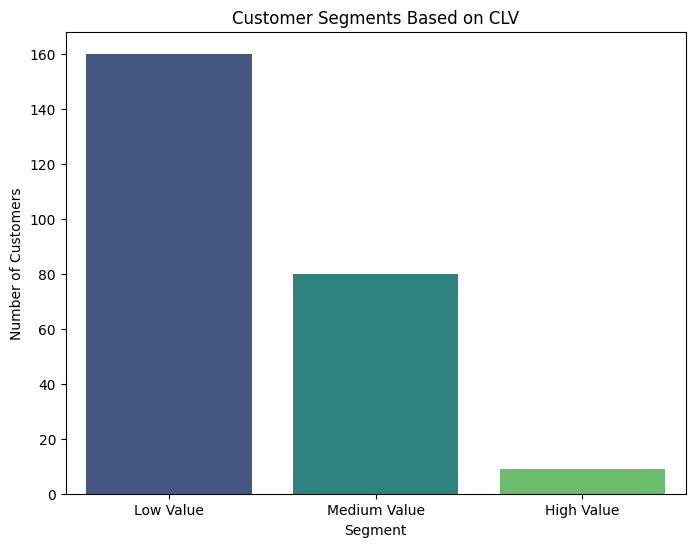

In [51]:
# Segment customers based on CLV
def segment_customers(clv):
    if clv >= 2750:
        return 'High Value'
    elif clv >= 1250:
        return 'Medium Value'
    else:
        return 'Low Value'

data['CLV_Segment'] = customer_clv.apply(segment_customers)

# Count customers in each segment
segment_counts = data['CLV_Segment'].value_counts()

# Visualize the segments
plt.figure(figsize=(8, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="viridis")
plt.title("Customer Segments Based on CLV")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features for the CLV prediction model
X = data[['avg_purchase_value', 'purchase_frequency', 'customer_lifespan']]  # Example features
y = data['CLV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict CLV on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Use the model to predict future CLV for new customers


KeyError: "['purchase_frequency'] not in index"

### 3. ROI Calculation

In [ ]:
# ROI Calculation

# Assume 'campaign_cost' and 'campaign_revenue' columns exist or simulate them
# Example: Simulate campaign costs and revenues
np.random.seed(42)
data['campaign_cost'] = np.random.uniform(1000, 5000, size=len(data))
data['campaign_revenue'] = np.random.uniform(2000, 10000, size=len(data))

# Calculate ROI for each campaign
data['ROI'] = (data['campaign_revenue'] - data['campaign_cost']) / data['campaign_cost']

# Group by marketing channel to calculate total ROI
roi_by_campaign = data.groupby('marketing_channel')['ROI'].mean()

print("ROI by Marketing Channel:")
print(roi_by_campaign)

# Optional: Visualize the ROI Results
plt.figure(figsize=(8, 6))
sns.barplot(x=roi_by_campaign.index, y=roi_by_campaign.values, palette="coolwarm")
plt.title("Average ROI by Marketing Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("ROI")
plt.show()
